In [1]:
model_name = 'rec_tau50_hgg05_a05'
view = '002'

L_scatt/L0 (fraction of scattered light) = 0.0146
L_direc/L0 (fraction of direct    light) = 0.0002
L_tot/L0   (fraction of escaped   light) = 0.0147


Text(0.5, 1.0, 'Total Light')

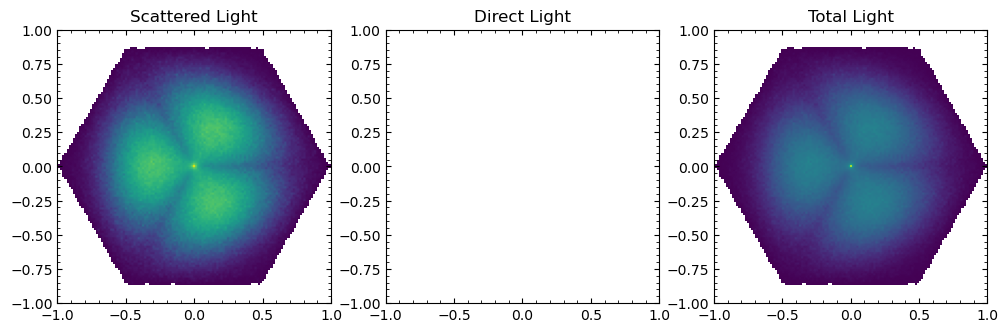

In [2]:
try:
    a = fits.open(model_name+'_obs_'+view+'.fits.gz')
except:
    a = fits.open(model_name+'_obs.fits.gz')

im0 = a[0].data
im1 = a[1].data
im2 = a[2].data
im  = im0 + im1

w0 = np.where(im0 <= 0.0)
w1 = np.where(im1 <= 0.0)
w2 = np.where(im2 <= 0.0)
w  = np.where(im  <= 0.0)
im0[w0] = np.nan
im1[w1] = np.nan
im2[w2] = np.nan
im[w]   = np.nan

f_scatt = np.nansum(im0)/np.nansum(im2)
f_direc = np.nansum(im1)/np.nansum(im2)
f_tot   = np.nansum(im) /np.nansum(im2)
print('L_scatt/L0 (fraction of scattered light) = %.4f' % f_scatt)
print('L_direc/L0 (fraction of direct    light) = %.4f' % f_direc)
print('L_tot/L0   (fraction of escaped   light) = %.4f' % f_tot)

im0_norm = np.nanmedian(im0)
im_norm  = np.nanmedian(im)

#import copy
cmap    = plt.get_cmap('viridis')
cmap.set_under(color='w')
#plt.set_cmap(cmap)

f = plt.figure(figsize=(12,36))
axis_range = [-1.0, 1.0, -1.0, 1.0]
f.add_subplot(1,3,1)
plt.imshow(np.arcsinh(im0/im0_norm), origin='lower', extent=axis_range, cmap=cmap)
#plt.imshow(im0, origin='lower', extent=axis_range, cmap=cmap)
plt.title('Scattered Light')
f.add_subplot(1,3,2)
plt.imshow(im1, origin='lower', extent=axis_range, cmap=cmap)
plt.title('Direct Light')
f.add_subplot(1,3,3)
plt.imshow(np.arcsinh(im/im_norm), origin='lower', extent=axis_range, cmap=cmap)
plt.title('Total Light')

Text(0, 0.5, 'intensity profile')

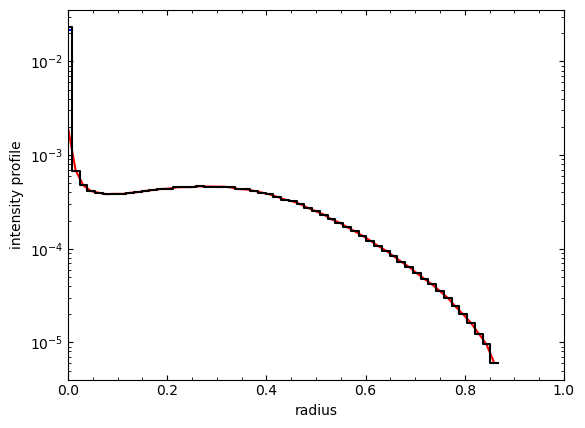

In [3]:
from radial_profile import *

r, Iscatt = radial_profile(im0)
r, Idirec = radial_profile(im1)
r, Itot   = radial_profile(im)

plt.plot(r, Iscatt, color='red')
plt.plot(r, Idirec, color='blue',  drawstyle='steps-mid')
plt.plot(r, Itot,   color='black', drawstyle='steps-mid')
plt.yscale('log')
plt.xlim(0.0,1.0)
plt.xlabel('radius')
plt.ylabel('intensity profile')